In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("C:/DS/Adult Census Income Prediction/notebook/data/adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [7]:
data = data.rename(columns={'education-num': 'education_num', 'marital-status': 'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hours_per_week'})

In [8]:
data.shape

(32561, 15)

In [9]:
data['education'].nunique()

16

In [11]:
data['education_num'].nunique()

16

In [8]:
data['education-num'].value_counts()

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [12]:
data['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [13]:
# Check null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [14]:
# check duplicet value in data set
data.duplicated().sum()

24

In [15]:
# drop duplicate value from data
data.drop_duplicates(inplace=True)

In [16]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# saprate catigorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [18]:
# fetch the unique value from catigorical data
for i in catigorical_features:
    print(i,data[i].unique())
    print("*"*80)

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
********************************************************************************
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
********************************************************************************
marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
********************************************************************************
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
*****************

In [19]:
# remove ? and replace with mode value
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["country"] = data["country"].replace(" ?"," United-States")

In [20]:
sns.set(rc={"figure.figsize":(15,6)})

'marital-status'


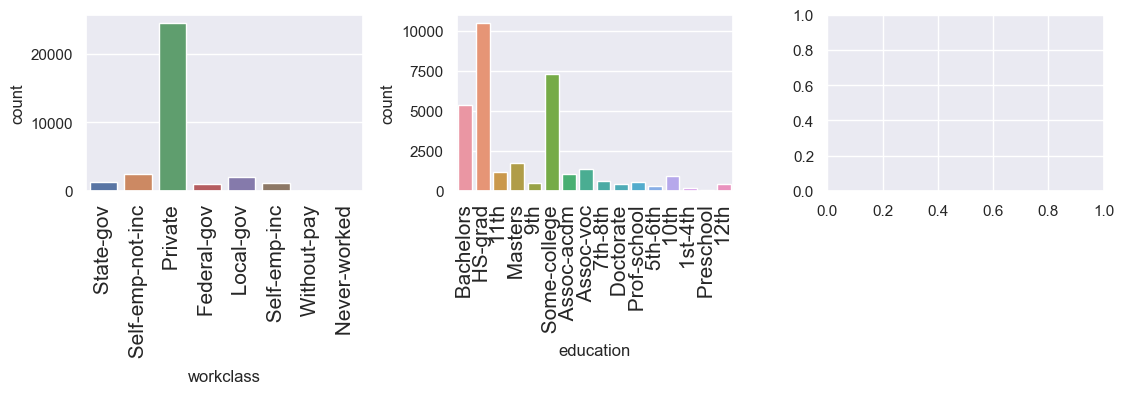

In [21]:
cato1 = ['workclass', 'education', 'marital_status', 'occupation']
try:
    for i in range(0,len(cato1)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato1[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

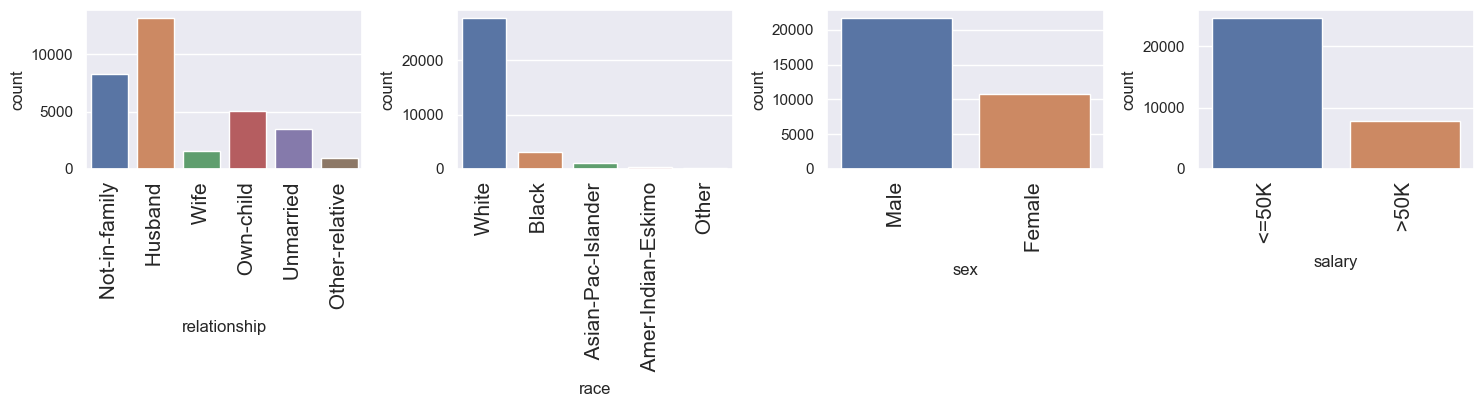

In [22]:
cato2 = ['relationship', 'race', 'sex', 'salary']
try:
    for i in range(0,len(cato2)):
        plt.subplot(2,4,i+1)
        sns.countplot(x=data[cato2[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)


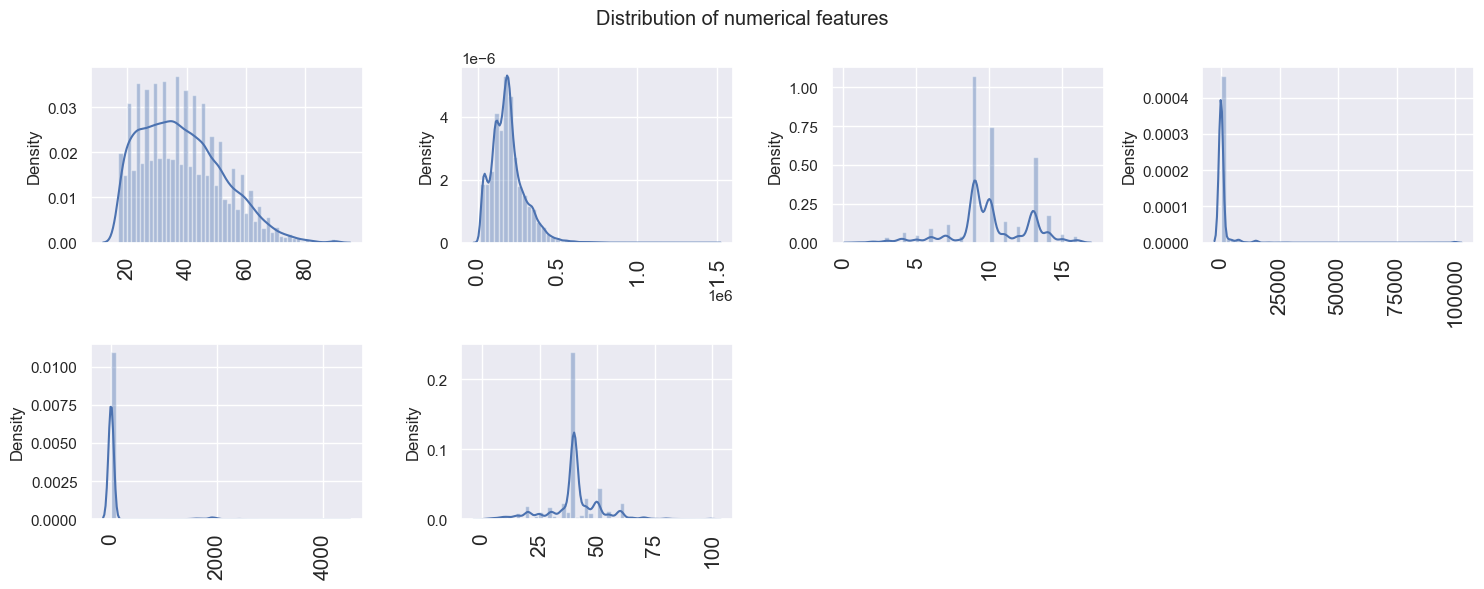

In [23]:
try:
    plt.suptitle("Distribution of numerical features")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

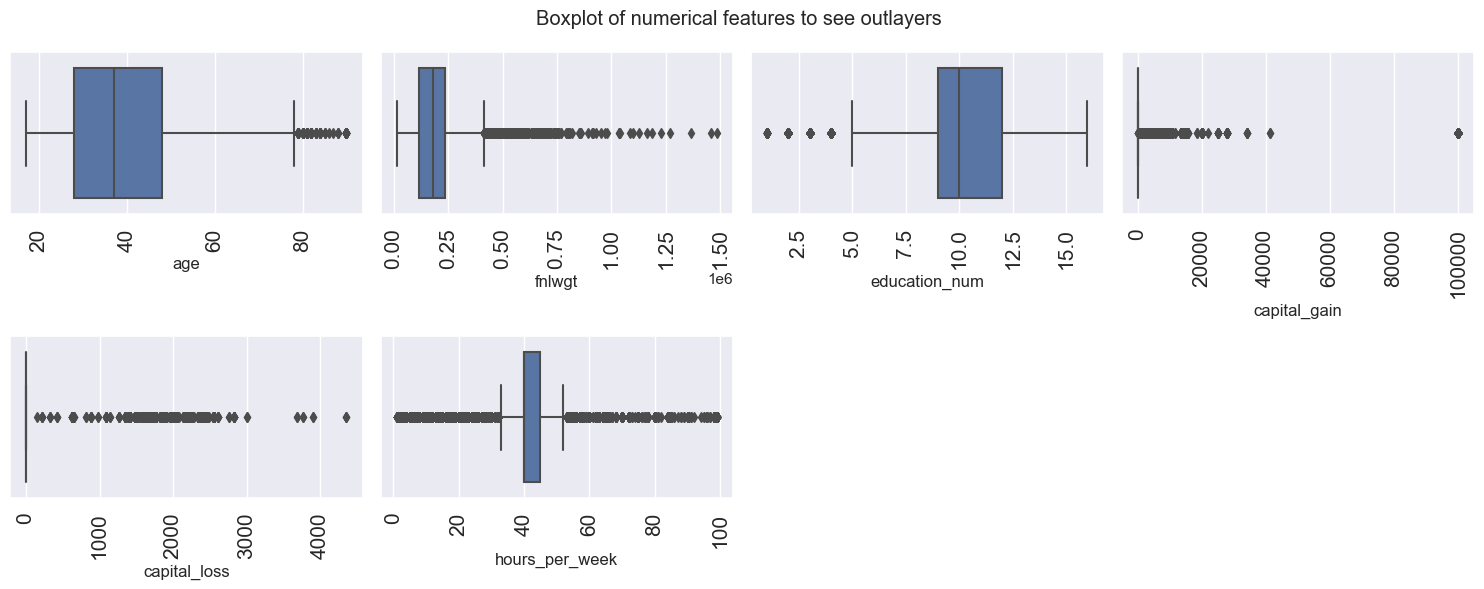

In [24]:
try:
    plt.suptitle("Boxplot of numerical features to see outlayers ")
    for i in range(0,len(numerical_features)):
        plt.subplot(2,4,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.xticks(size=15,rotation=90)
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='salary'>

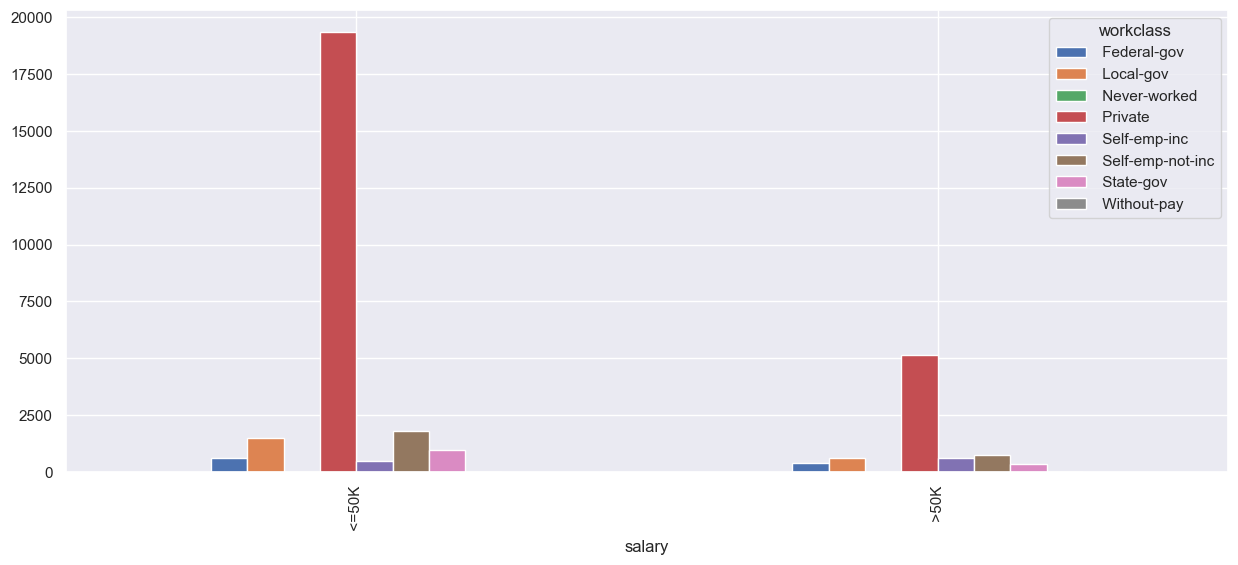

In [25]:
class_salary = pd.crosstab(data['salary'],data['workclass'])
class_salary.plot(kind='bar')

<Axes: xlabel='salary'>

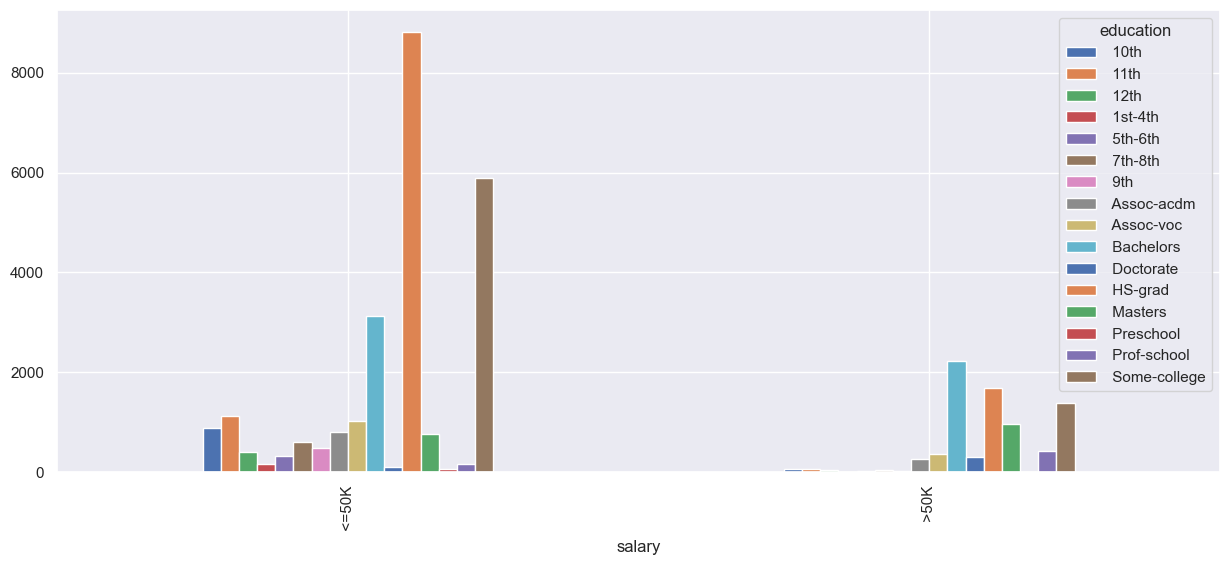

In [26]:
education_num = pd.crosstab(data['salary'],data['education'])
education_num.plot(kind="bar")

<Axes: xlabel='salary'>

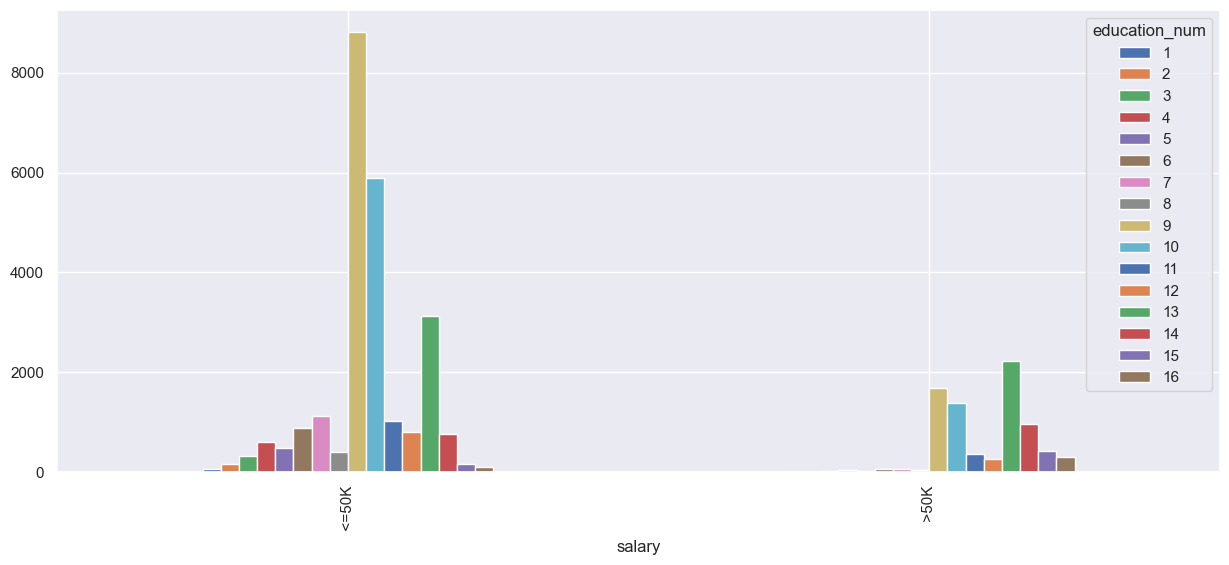

In [29]:
education_num = pd.crosstab(data['salary'],data['education_num'])
education_num.plot(kind="bar")

<Axes: xlabel='salary'>

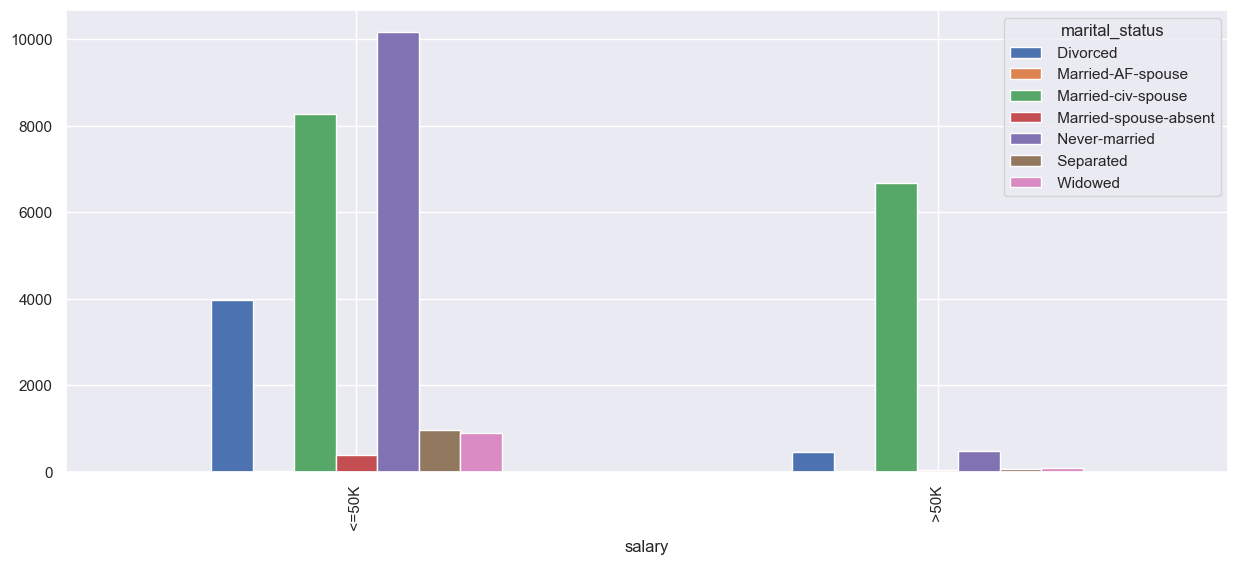

In [30]:
marital_status = pd.crosstab(data['salary'],data['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='salary'>

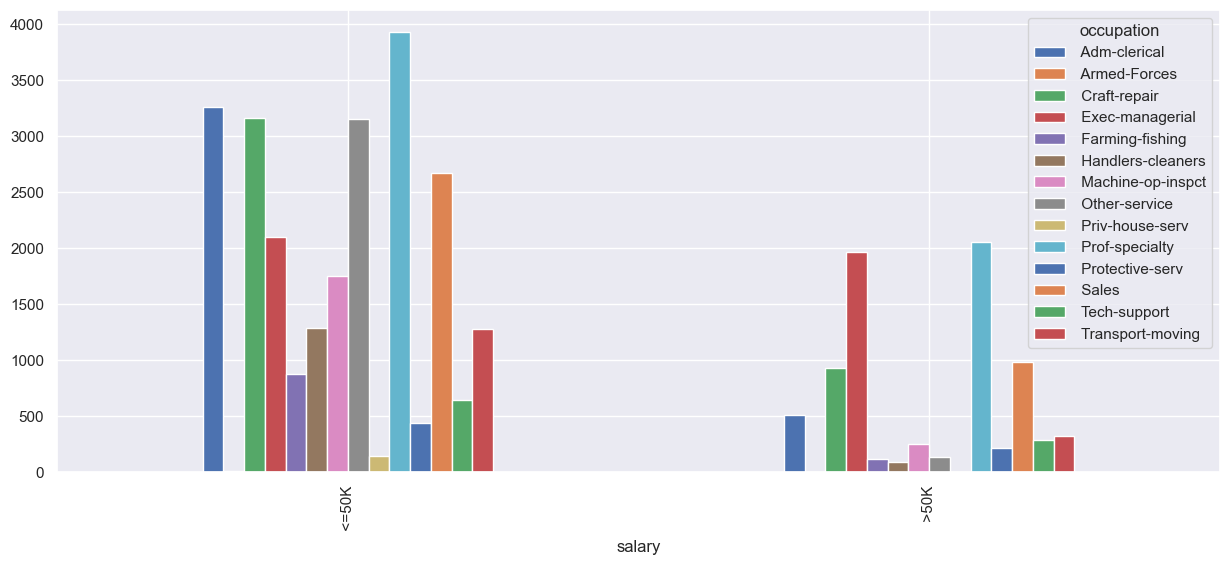

In [31]:
occupation = pd.crosstab(data['salary'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='salary'>

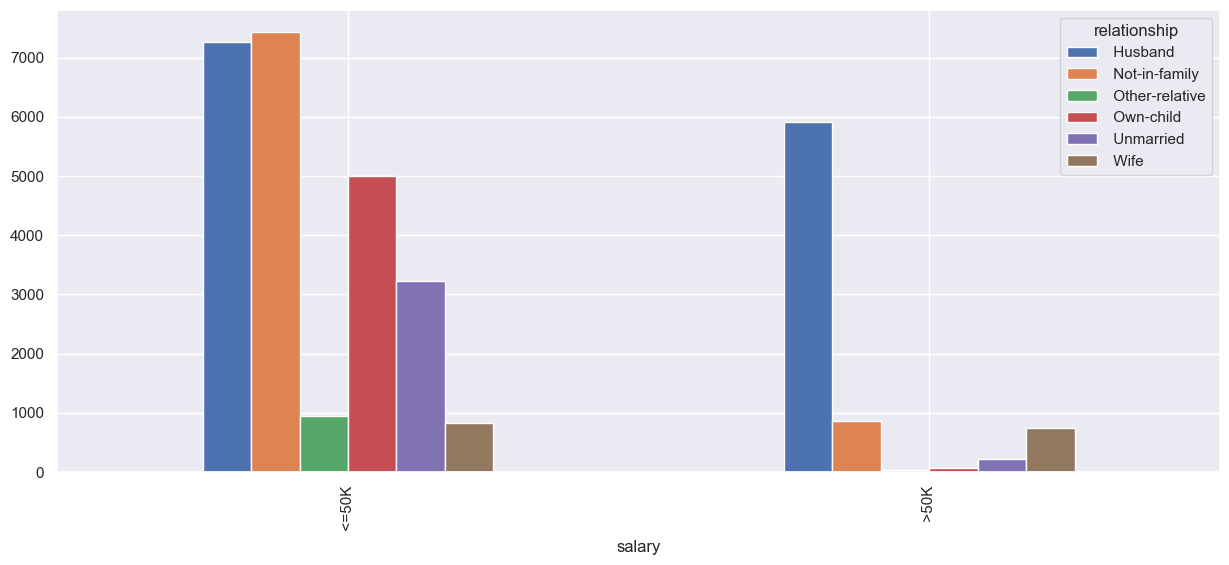

In [32]:
relationship = pd.crosstab(data['salary'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='salary'>

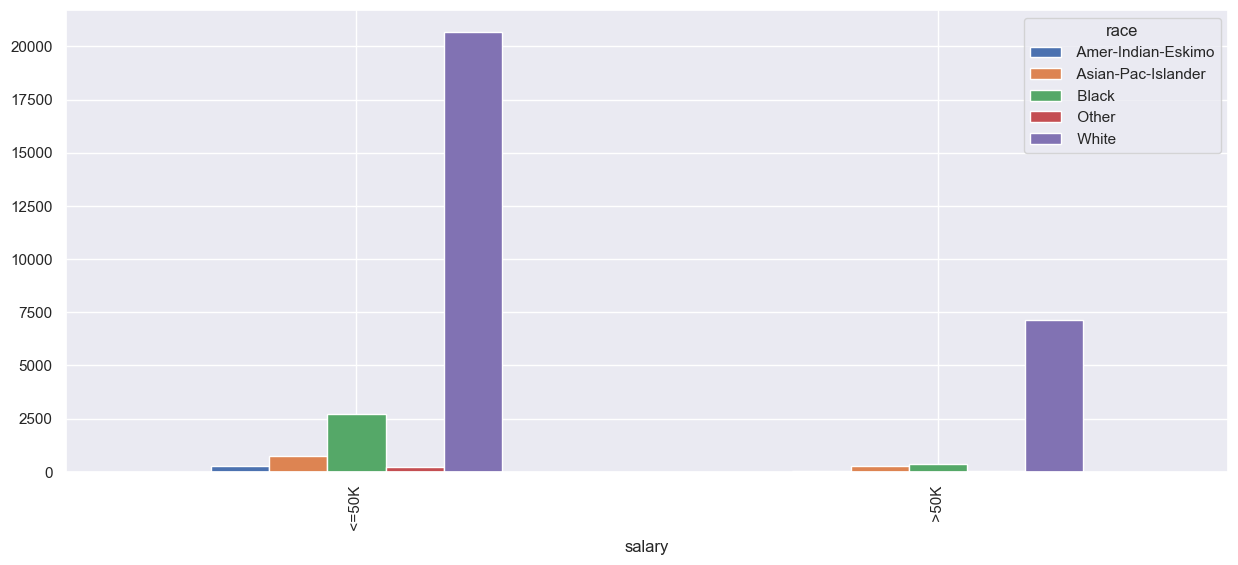

In [ ]:
race = pd.crosstab(data['salary'],data['race'])
race.plot(kind="bar")

<Axes: xlabel='salary'>

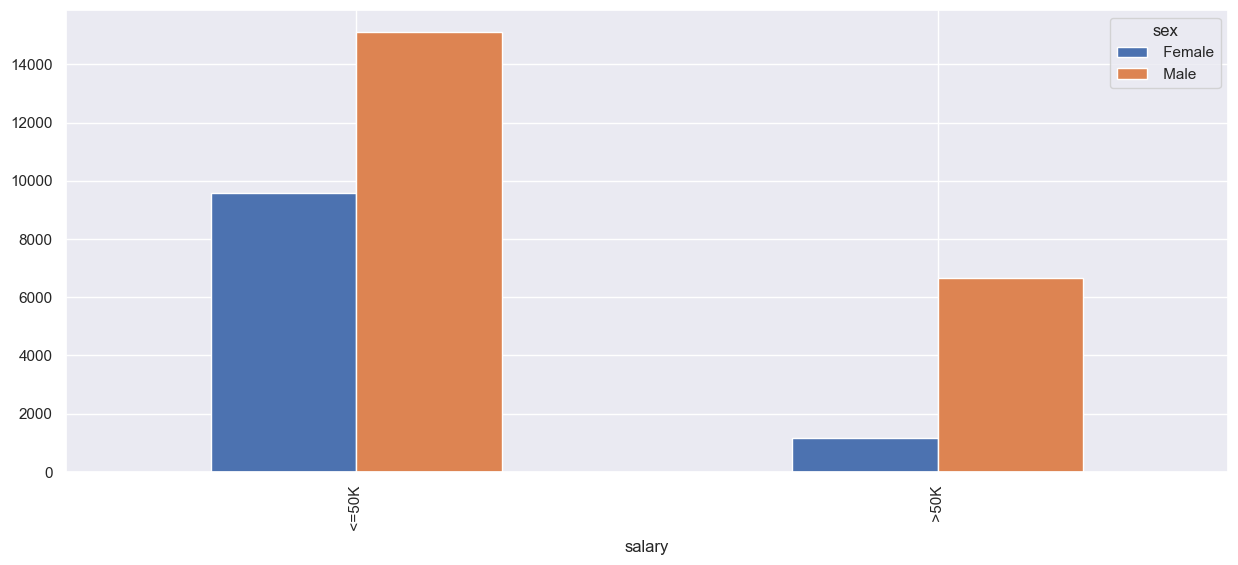

In [33]:
sex = pd.crosstab(data['salary'],data['sex'])
sex.plot(kind="bar")

In [34]:
catigorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [36]:
data["salary"] = data["salary"].map({' <=50K':0, ' >50K':1})

<Axes: >

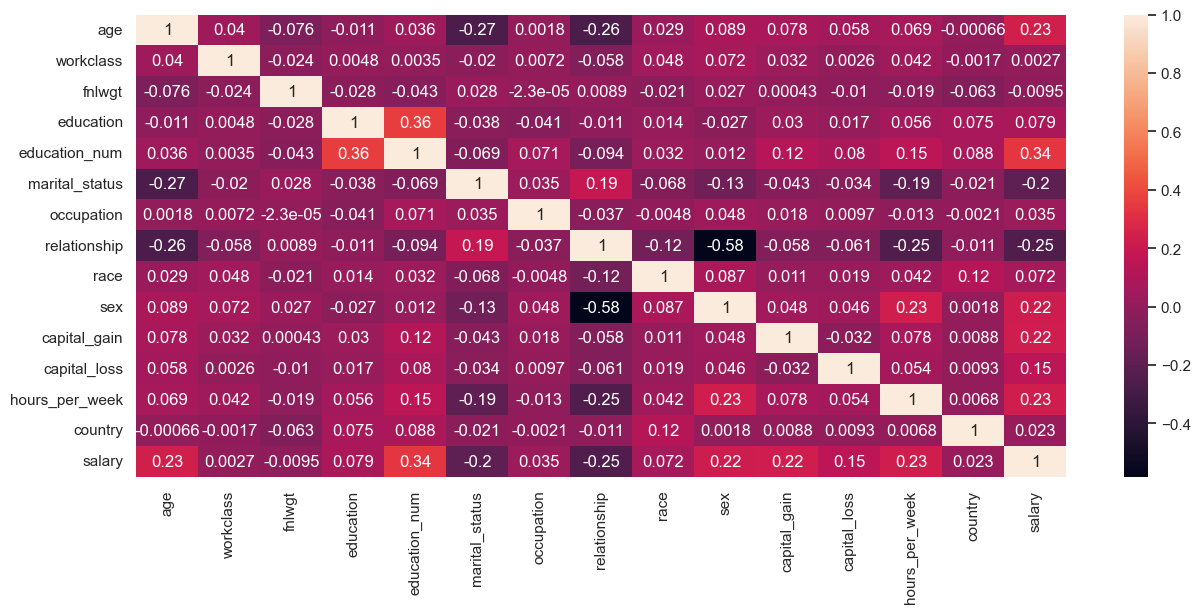

In [37]:
sns.heatmap(data.corr(),annot=True)

In [38]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [39]:
data.drop(["fnlwgt","education"],axis=1,inplace=True)

In [40]:
data.to_csv("adult_income_clean.csv",index=False)

In [41]:
data1 = pd.read_csv("adult_income_clean.csv")

In [42]:
data1.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [43]:
data.shape

(32537, 13)

In [44]:
data1.shape

(32537, 13)

In [45]:
# Saprate dependent and indipendent features
x = data.drop("salary",axis=1)
y = data["salary"]

In [46]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'country'],
      dtype='object')


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [49]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report, roc_auc_score,ConfusionMatrixDisplay

In [52]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(), 
    "SVC Classifier": SVC(),
    "GaussianNB": GaussianNB(),
    "XGBClassifier":XGBClassifier(objective='binary:logistic',n_jobs=-1)
}

In [53]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [54]:
models_list = []
accuracy_list = []
    
for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        accuracy_list.append(model_test_accuracy)
        print('='*35)
        print('\n')

Decision Tree
Model performance for Training set
- Accuracy: 0.9783
- F1 score: 0.9532
- Precision: 0.9856
- Recall: 0.9229
- Roc Auc Score: 0.9593
----------------------------------
Model performance for Test set
- Accuracy: 0.8072
- F1 score: 0.6065
- Precision: 0.6097
- Recall: 0.6032
- Roc Auc Score: 0.7385


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9783
- F1 score: 0.9542
- Precision: 0.9655
- Recall: 0.9431
- Roc Auc Score: 0.9662
----------------------------------
Model performance for Test set
- Accuracy: 0.8531
- F1 score: 0.6796
- Precision: 0.7343
- Recall: 0.6326
- Roc Auc Score: 0.7789


Logistic Regression
Model performance for Training set
- Accuracy: 0.8063
- F1 score: 0.4774
- Precision: 0.6750
- Recall: 0.3693
- Roc Auc Score: 0.6566
----------------------------------
Model performance for Test set
- Accuracy: 0.8093
- F1 score: 0.5038
- Precision: 0.7016
- Recall: 0.3930
- Roc Auc Score: 0.6692


SVC Classifier
Model performance for T